1. Исходные данные

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
#import matlab.engine as men

from statsmodels.stats.weightstats import ztest

In [4]:
np.random.seed(103)

#X1 ~ R(5, 15)
a = 5
b = 15
n1 = 100
N = 100
X1 = np.random.uniform(a, b, size = n1)
m_v1 = np.mean(X1)
d_v1 = np.var(X1, ddof = 1)
std_v1 = np.std(X1, ddof = 1)
print("X1:", "m_v1 = {}, d_v1 = {}, std_v1 = {}".format(m_v1, d_v1, std_v1))

#X2 ~ N(10, 5)
m2 = 10
std2 = 5
n2 = 100
X2 = np.random.randn(n2) * std2 + m2
m_v2 = np.mean(X2)
d_v2 = np.var(X2, ddof = 1)
std_v2 = np.std(X2, ddof = 1)
print("X2:", "m_v2 = {}, d_v2 = {}, std_v2 = {}".format(m_v2, d_v2, std_v2))

#X3 ~ N(10, 2)
m3 = 10
std3 = 2
n3 = 100
X3 = np.random.randn(n3) * std3 + m3
m_v3 = np.mean(X3)
d_v3 = np.var(X3, ddof = 1)
std_v3 = np.std(X3, ddof = 1)
print("X3:", "m_v3 = {}, d_v3 = {}, std_v3 = {}".format(m_v3, d_v3, std_v3))

#X2 ~ N(10, 5)
m4 = 10
std4 = 5
n4 = 100
X4 = np.random.randn(n4) * std4 + m4
m_v4 = np.mean(X4)
d_v4 = np.var(X4, ddof = 1)
std_v4 = np.std(X4, ddof = 1)
print("X4:", "m_v4 = {}, d_v4 = {}, std_v4 = {}".format(m_v4, d_v4, std_v4))

#pooled
X_pooled = np.hstack([X1, X2, X3, X4])
m_v_pooled = np.mean(X_pooled)
d_v_pooled = np.var(X_pooled, ddof = 1)
std_v_pooled = np.std(X_pooled, ddof = 1)
print("X_pooled:", "m_v_pooled = {}, d_v_pooled = {}, std_v4 = {}".format(m_v_pooled, d_v_pooled, std_v_pooled))

X1: m_v1 = 9.78220025974761, d_v1 = 8.12899060595628, std_v1 = 2.851138475408776
X2: m_v2 = 9.922408463550555, d_v2 = 27.0922519252082, std_v2 = 5.205021798725554
X3: m_v3 = 9.658376648894832, d_v3 = 4.933806836272967, std_v3 = 2.221217422107293
X4: m_v4 = 10.210985715257024, d_v4 = 20.739590633437075, std_v4 = 4.554074069823313
X_pooled: m_v_pooled = 9.893492771862505, d_v_pooled = 15.151628346298017, std_v4 = 3.892509260913584


2. Визуальное представление выборки

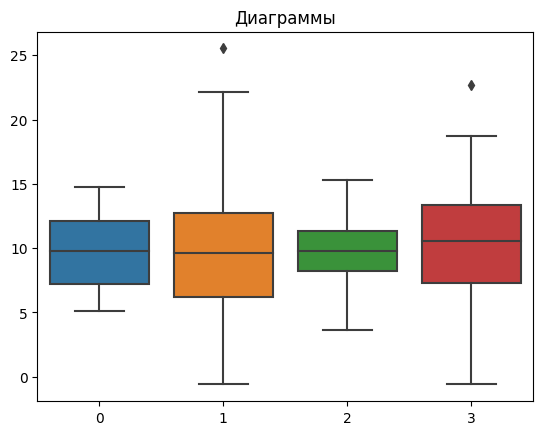

In [5]:
sns.boxplot(data=[X1, X2, X3, X4]).set_title('Диаграммы');

3. Проверка условия применимости дисперсионного анализа


In [6]:
st.bartlett(X1, X2, X3, X4)

BartlettResult(statistic=85.627383541003, pvalue=1.903190337844027e-18)

4. Однофакторный дисперсионный анализ

In [7]:
k = 4
#N = n1 = n2 = n3 = n4 (по условию)
N = 100

#Межгрупповая дисперсия - Группировочный признак
m_v = [m_v1, m_v2, m_v3, m_v4]
d_mgr = 0
for i in range(4):
  d_mgr += N * ((m_v[i] - m_v_pooled) ** 2)
d_mgr /= 4 * N
deg_free_mgr = k - 1
d_mgr_unbiased = 4 * N * d_mgr / deg_free_mgr
print("Межгрупповая дисперсия:", "Межгрупповая дисперсия = {}, Число степеней свободы = {}, Несмещённая оценка = {}".format(d_mgr, deg_free_mgr, d_mgr_unbiased))

Межгрупповая дисперсия: Межгрупповая дисперсия = 0.042325875215826994, Число степеней свободы = 3, Несмещённая оценка = 5.6434500287769325


In [8]:
#Внутригрупповая дисперсия - Группировочный признак
d_v = [d_v1, d_v2, d_v3, d_v4]
d_ingr = 0
for i in range(4):
  d_ingr += N * d_v[i]
d_ingr /= 4 * N
deg_free_ingr = 4 * N - k
d_ingr_unbiased = 4 * N * d_ingr / deg_free_ingr
print("Внутригрупповая дисперсия:", "Внутригрупповая дисперсия = {}, Число степеней свободы = {}, Несмещённая оценка = {}".format(d_ingr, deg_free_ingr, d_ingr_unbiased))

Внутригрупповая дисперсия: Внутригрупповая дисперсия = 15.22366000021863, Число степеней свободы = 396, Несмещённая оценка = 15.37743434365518


In [9]:
#Общая дисперсия - Группировочный признак
print("Общая дисперсия:", "Общая дисперсия = {}, Число степеней свободы = {}, Несмещённая оценка = {}".format(d_v_pooled, 4 * N - 1, d_v_pooled *(4 * N) / (4 * N - 1)))

Общая дисперсия: Общая дисперсия = 15.151628346298017, Число степеней свободы = 399, Несмещённая оценка = 15.189602352178463


In [10]:
st.f_oneway(X1, X2, X3, X4)

F_onewayResult(statistic=0.37070257932034145, pvalue=0.7741902460294507)

5. Метод линейных контрастов



In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway

In [12]:
df = pd.DataFrame({'score': np.array([X1, X2, X3, X4]).flatten() ,
 'group': np.repeat(['X1', 'X2', 'X3', 'X4' ], repeats= 100)})

tukey = pairwise_tukeyhsd(endog=df['score'],
  groups=df['group'],
  alpha= 0.05 )

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    X1     X2   0.1402 0.9942 -1.2834 1.5638  False
    X1     X3  -0.1238  0.996 -1.5474 1.2998  False
    X1     X4   0.4288 0.8648 -0.9948 1.8524  False
    X2     X3   -0.264 0.9638 -1.6876 1.1596  False
    X2     X4   0.2886 0.9535  -1.135 1.7122  False
    X3     X4   0.5526 0.7486  -0.871 1.9762  False
---------------------------------------------------


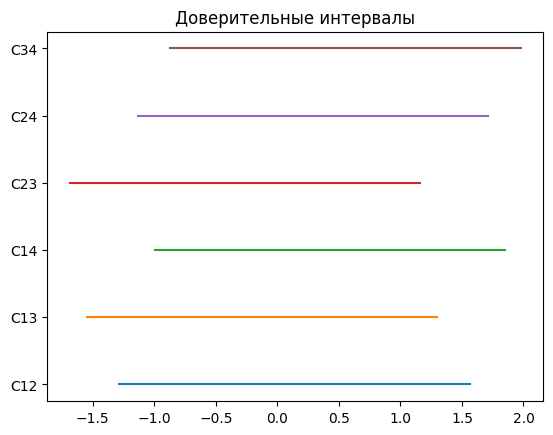

In [16]:
c = ['С12', 'С13', 'С14', 'С23', 'С24', 'С34']
plt.title('Доверительные интервалы')
for i in range(6):
  lower, upper = tukey.confint[i]
  plt.plot((lower, upper), (c[i], c[i]));